Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Importing the Data Files

In [ ]:
TrainDataSet = pd.read_csv("train.csv")
TestDataSet = pd.read_csv("test.csv")

O/P of Train Data Set

In [ ]:
TrainDataSet

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


O/P of Test Data Set

In [ ]:
TestDataSet

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,C
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
2327,Male,No,21,No,Healthcare,1.0,Low,4.0,Cat_4,D
2328,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
2329,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,D
2330,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A


REMOVED THE ATTRIBUTE 'ID' FROM TRAIN DATASET AS IT IS NOT FOUND IN TEST DATASET

In [ ]:
del TrainDataSet['ID']

In [ ]:
TrainDataSet

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Q1. Summarize the dataset                          
      A. Calculate summary statistics of the dataset(Describe Function)

In [ ]:
TrainDataSet.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [ ]:
TestDataSet.describe()

,Age,Work_Experience,Family_Size
count,2332.000000,2091.000000,2228.000000
mean,43.864494,2.558584,2.821813
std,16.931299,3.375508,1.548535
min,18.000000,0.000000,1.000000
25%,31.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


B. Check the distinct values of the categorical variables. List them in the notebook (Unique Function)

In [ ]:
TrainDataSet.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [ ]:
print("Gender: ", TrainDataSet["Gender"].unique())

print("Ever_Married: ", TrainDataSet["Ever_Married"].unique())

print("Graduated: ", TrainDataSet["Graduated"].unique())

print("Profession: ", TrainDataSet["Profession"].unique())

print("Spending_Score: ", TrainDataSet["Spending_Score"].unique())

print("Var_1: ", TrainDataSet["Var_1"].unique())

Gender:  ['Male' 'Female']
Ever_Married:  ['No' 'Yes' nan]
Graduated:  ['No' 'Yes' nan]
Profession:  ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Spending_Score:  ['Low' 'Average' 'High']
Var_1:  ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


C.	For the numerical variables create boxplot

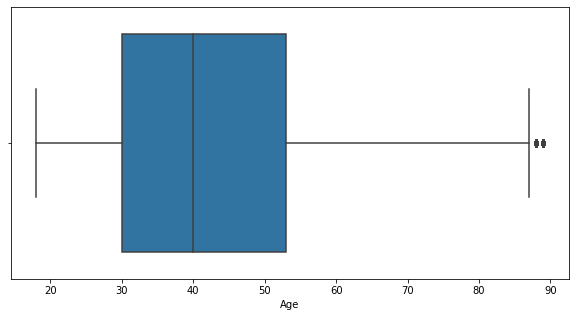

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = TrainDataSet["Age"])
plt.show()

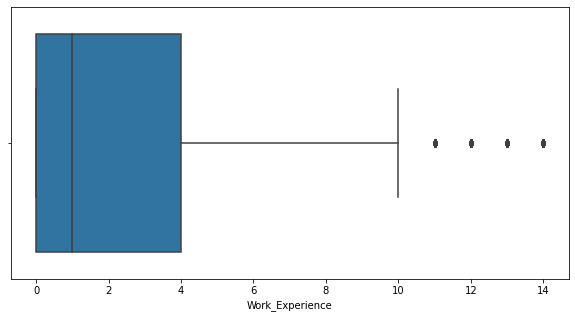

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = TrainDataSet["Work_Experience"])
plt.show()

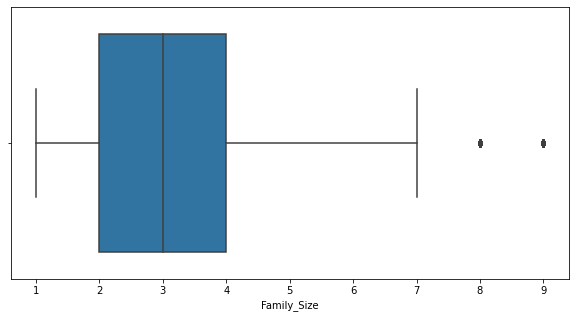

In [ ]:
plt.figure(figsize = (10,5))
sns.boxplot(x = TrainDataSet["Family_Size"])
plt.show()

2 Clean the dataset  check null values.

In [ ]:
TrainDataSet.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

APPLIED MEAN OF ROWS TO REPLACE THE NULL VALUES

In [ ]:
TrainDataSet['Work_Experience'] = TrainDataSet['Work_Experience'].fillna(TrainDataSet['Work_Experience'].mean())
TrainDataSet['Family_Size'] = TrainDataSet['Family_Size'].fillna(TrainDataSet['Family_Size'].mean())
TrainDataSet = TrainDataSet.dropna(axis = 0, how = 'any')

In [ ]:
TrainDataSet.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [ ]:
TestDataSet.isnull().sum()

Gender               0
Ever_Married        46
Age                  0
Graduated           22
Profession          34
Work_Experience    241
Spending_Score       0
Family_Size        104
Var_1               28
Segmentation         0
dtype: int64

In [ ]:
TestDataSet['Work_Experience'] = TestDataSet['Work_Experience'].fillna(TestDataSet['Work_Experience'].mean())
TestDataSet['Family_Size'] = TestDataSet['Family_Size'].fillna(TestDataSet['Family_Size'].mean())
TestDataSet = TestDataSet.dropna(axis = 0, how = 'any')

In [ ]:
TestDataSet.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

3	Apply one hot encoding to convert categorical variables to numerical variables

In [ ]:
OHETrainDataSet = pd.get_dummies(TrainDataSet, columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])
OHETestDataSet = pd.get_dummies(TestDataSet, columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1'])

OHETrainDataSet = OHETrainDataSet.iloc[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,3]]
OHETestDataSet = OHETestDataSet.iloc[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,3]]

In [ ]:
OHETrainDataSet

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,22,1.000000,4.0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,D
1,38,2.641663,3.0,1,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,A
2,67,1.000000,1.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,B
3,67,0.000000,2.0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,B
4,40,2.641663,6.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.000000,5.0,0,1,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,B
8064,35,3.000000,4.0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,D
8065,33,1.000000,1.0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,D
8066,27,1.000000,4.0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,B


In [ ]:
OHETestDataSet

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,36,0.000000,1.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,B
1,37,8.000000,4.0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,C
3,59,11.000000,2.0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,C
4,19,2.558584,4.0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,C
5,47,0.000000,5.0,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,21,1.000000,4.0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,D
2328,35,1.000000,2.0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,D
2329,29,9.000000,4.0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,D
2330,35,1.000000,1.0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,A


4	Perform feature scaling

(StandardScaler FUNCTION)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ScaledTrainDataSet = scaler.fit_transform(OHETrainDataSet.iloc[:, : -1])
ScaledTestDataSet = scaler.fit_transform(OHETestDataSet.iloc[:, : -1])

In [ ]:
ScaledTrainDataSet

array([[-1.28884403, -0.50601226,  0.76915094, ..., -0.10331868,
        -1.40404022, -0.1602459 ],
       [-0.33008515,  0.00151916,  0.10180441, ..., -0.10331868,
        -1.40404022, -0.1602459 ],
       [ 1.40766531, -0.50601226, -1.23288865, ..., -0.10331868,
         0.71223031, -0.1602459 ],
       ...,
       [-0.6296973 , -0.50601226, -1.23288865, ..., -0.10331868,
         0.71223031, -0.1602459 ],
       [-0.98923188, -0.50601226,  0.76915094, ..., -0.10331868,
         0.71223031, -0.1602459 ],
       [-0.39000758, -0.8151691 ,  0.10180441, ..., -0.10331868,
        -1.40404022, -0.1602459 ]])

In [ ]:
ScaledTestDataSet

array([[-0.46189097, -0.79540197, -1.19984559, ..., -0.10266834,
         0.72522518, -0.15693391],
       [-0.40273952,  1.69651358,  0.7744917 , ..., -0.10266834,
         0.72522518, -0.15693391],
       [ 0.89859227,  2.63098191, -0.54173316, ..., -0.10266834,
         0.72522518, -0.15693391],
       ...,
       [-0.87595109,  2.00800302,  0.7744917 , ..., -0.10266834,
         0.72522518, -0.15693391],
       [-0.52104241, -0.48391253, -1.19984559, ..., -0.10266834,
         0.72522518, -0.15693391],
       [ 0.18877493, -0.48391253,  1.43260413, ..., -0.10266834,
        -1.37888208, -0.15693391]])

5 Run the following models and evaluate the results on test dataset using accuracy, confusion matrix and ROC Curve:  a.	Naïve Bayes
b.	SVM: Try various kernels
c.	Random forest classification model


 X variables will contain all the columns except the last one which is 'Segmentation'. Y will contain only last column

In [ ]:
X_Train = OHETrainDataSet.iloc[:, : -1]
Y_Train = OHETrainDataSet.iloc[:, -1].to_frame()

X_Test = OHETestDataSet.iloc[:, : -1]
Y_Test = OHETestDataSet.iloc[:, -1].to_frame()

CREATED REQUIRED MODELS

In [ ]:
Models = {}
from sklearn.naive_bayes import GaussianNB
Models['Naive Bayes'] = GaussianNB()

from sklearn.svm import SVC
Models['Support Vector Machines - Linear Kernel'] = SVC(kernel = 'linear')
Models['Support Vector Machines - Poly Kernel'] = SVC(kernel = 'poly')
Models['Support Vector Machines - RBF Kernel'] = SVC(kernel = 'rbf')

from sklearn.ensemble import RandomForestClassifier
Models['Random Forest'] = RandomForestClassifier(max_features = 'sqrt',n_jobs = -1,random_state = 1)

Evaluated the tests using accuracy between predictions and segmentation column, fit function is used for achieving better accuracy. Predict function is using for predicting the values.

In [ ]:
from sklearn.metrics import accuracy_score

Accuracy = {}
for key in Models.keys():
    Models[key].fit(X_Train, Y_Train.values.ravel())
    Predictions = Models[key].predict(X_Test) 
    Accuracy[key] = accuracy_score(Predictions, Y_Test)

OUTPUT

In [ ]:
ModelDF = pd.DataFrame(index = Models.keys(), columns = ['Accuracy'])
ModelDF['Accuracy'] = Accuracy.values()
ModelDF

,Accuracy
Naive Bayes,0.487075
Support Vector Machines - Linear Kernel,0.506122
Support Vector Machines - Poly Kernel,0.464399
Support Vector Machines - RBF Kernel,0.461224
Random Forest,0.734694


CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix

for i in Models:
  Tmp = Models[i].fit(X_Train, Y_Train.values.ravel())

  Predictions = Tmp.predict(X_Test)

  print("Confusion Matrix for ", i, ": \n")

  print(confusion_matrix(Y_Test, Predictions, normalize = "all", labels = ["A", "B", "C", "D"]))

  print("\n")

Confusion Matrix for  Naive Bayes : 

[[0.09251701 0.03265306 0.07346939 0.0521542 ]
 [0.04761905 0.04353741 0.10975057 0.03310658]
 [0.02086168 0.0276644  0.16054422 0.030839  ]
 [0.04671202 0.01950113 0.0185941  0.19047619]]


Confusion Matrix for  Support Vector Machines - Linear Kernel : 

[[0.14013605 0.03673469 0.03764172 0.03628118]
 [0.09705215 0.03945578 0.07301587 0.0244898 ]
 [0.05351474 0.01904762 0.14104308 0.02630385]
 [0.05895692 0.02222222 0.00861678 0.18548753]]


Confusion Matrix for  Support Vector Machines - Poly Kernel : 

[[0.06213152 0.02358277 0.0244898  0.14058957]
 [0.0521542  0.03446712 0.06621315 0.08117914]
 [0.030839   0.01405896 0.13333333 0.061678  ]
 [0.02312925 0.01179138 0.00589569 0.23446712]]


Confusion Matrix for  Support Vector Machines - RBF Kernel : 

[[0.11111111 0.02267574 0.05895692 0.05804989]
 [0.07936508 0.01179138 0.11337868 0.02947846]
 [0.04852608 0.00544218 0.15192744 0.03401361]
 [0.05396825 0.00907029 0.02585034 0.18639456]]


Confu

In [ ]:
#Created 5 ROC curves for Naive Bayes, 3 SVM kernels and Random Forest Classification.
random_state = np.random.RandomState(0)
n_classes = 4
Y_Train = label_binarize(Y_Train, classes=['A', 'B', 'C', 'D'])
Y_Test = label_binarize(Y_Test, classes=['A', 'B', 'C', 'D'])

In [ ]:
classifier = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=random_state))
y_score = classifier.fit(X_Train, Y_Train).decision_function(X_Test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_Test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_Test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

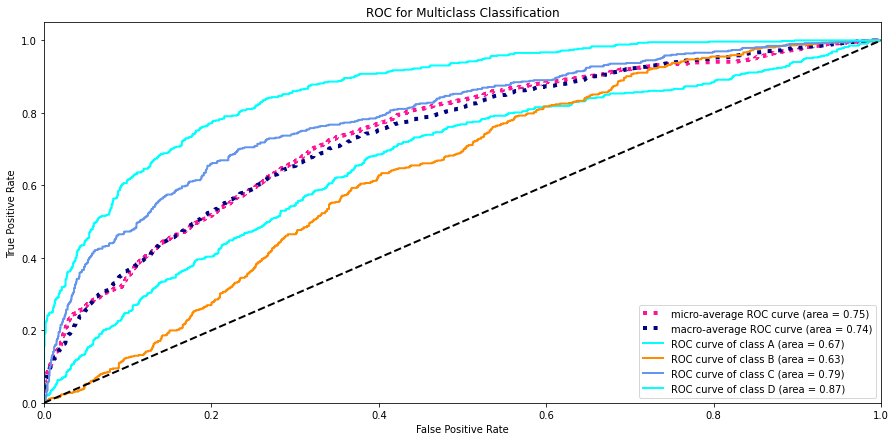

In [ ]:
lw = 2
TmpList = ['A', 'B', 'C', 'D']
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure(figsize = (15,7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(TmpList[i], roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

In [ ]:
classifier = OneVsRestClassifier(SVC(kernel="poly", probability=True, random_state=random_state))
y_score = classifier.fit(X_Train, Y_Train).decision_function(X_Test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(Y_Test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_Test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

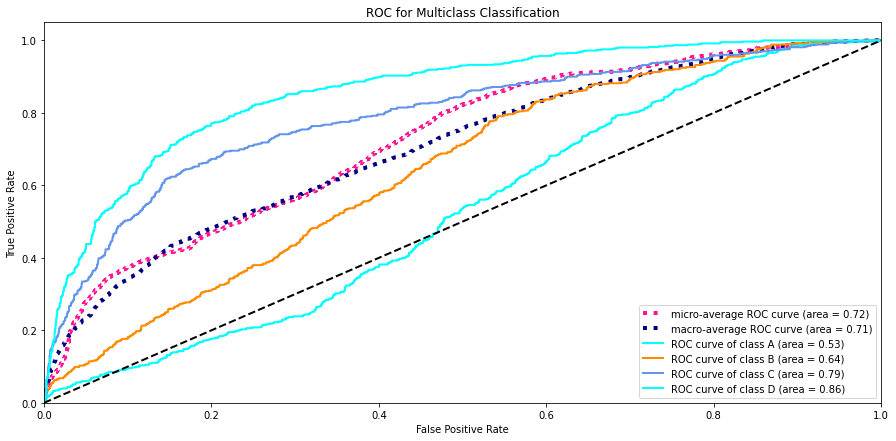

In [ ]:
lw = 2
TmpList = ['A', 'B', 'C', 'D']
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure(figsize = (15,7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(TmpList[i], roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

In [ ]:
classifier = OneVsRestClassifier(SVC(kernel="rbf", probability=True, random_state=random_state))

y_score = classifier.fit(X_Train, Y_Train).decision_function(X_Test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(Y_Test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_Test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

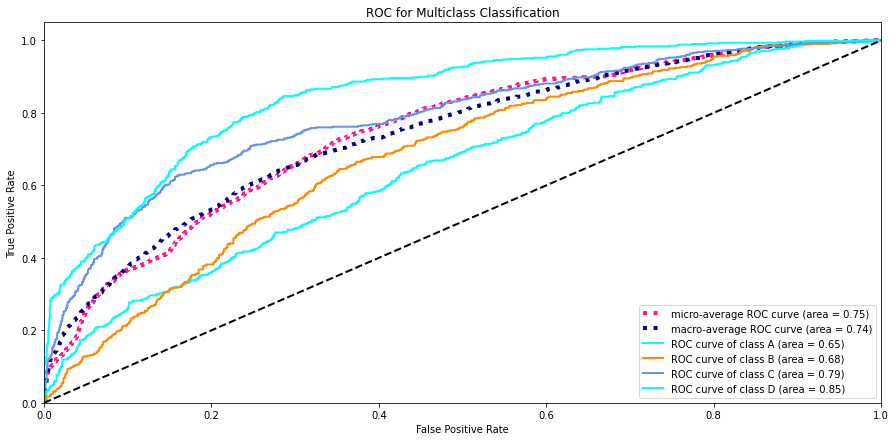

In [ ]:
lw = 2
TmpList = ['A', 'B', 'C', 'D']
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure(figsize = (15,7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(TmpList[i], roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

In [ ]:
classifier = OneVsRestClassifier(GaussianNB())

y_score = classifier.fit(X_Train, Y_Train).predict_proba(X_Test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(Y_Test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_Test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

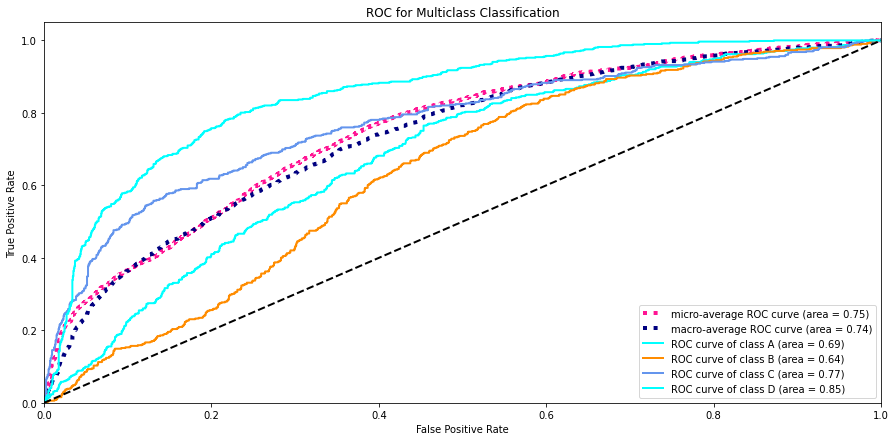

In [ ]:
lw = 2
TmpList = ['A', 'B', 'C', 'D']
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure(figsize = (15,7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(TmpList[i], roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

In [ ]:
classifier = OneVsRestClassifier(RandomForestClassifier(max_features = 'sqrt',n_jobs = -1,random_state = 1))

y_score = classifier.fit(X_Train, Y_Train).predict_proba(X_Test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):

    fpr[i], tpr[i], _ = roc_curve(Y_Test[:, i], y_score[:, i])

    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_Test.ravel(), y_score.ravel())

roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

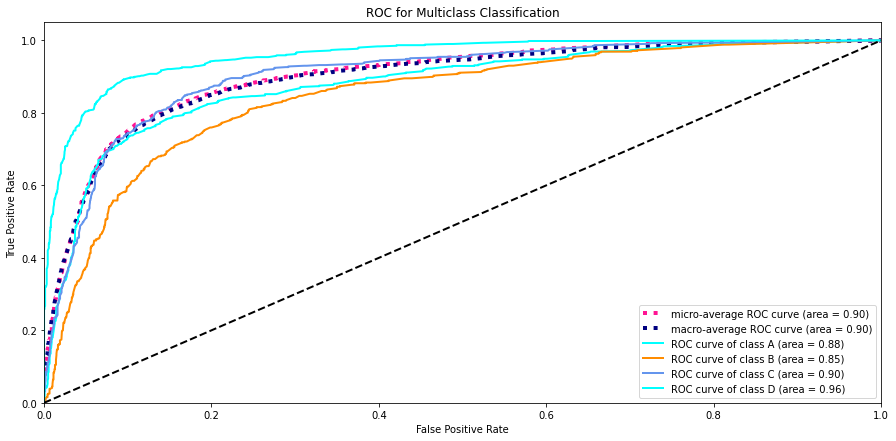

In [ ]:
lw = 2
TmpList = ['A', 'B', 'C', 'D']
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.figure(figsize = (15,7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(TmpList[i], roc_auc[i]),
    )
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC for Multiclass Classification")
plt.legend(loc="lower right")
plt.show()

6

In [32]:
# 1. Accuracy of Random Forest is highest.
# 2. Accuracy of SVM - RBF kernel is the lowest.
# 3. For SVMs, linear kernal has the highest accuracy.
# 4. ROC curve for Class A is highest in all the 5 curves.